In [1]:
# import libbares

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
import sklearn

In [3]:
# for split the data set into training data and testing data

from  sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [4]:
#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

### data collection and preprocessing

In [16]:
son=pd.read_csv("sonar.all-data.csv")
son.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [17]:
sonar=pd.read_csv("sonar.all-data.csv",header=None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [18]:
# information about the dataset

print("Features name in the data set: ","\n",sonar.columns)
print("======"*15)
print("Shape of the dataset(number of rows and columns):","\n",sonar.shape)
print("======"*15)
print("Information about the dataset: ","\n",sonar.info())

Features name in the data set:  
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')
Shape of the dataset(number of rows and columns): 
 (208, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64

In [20]:
sonar.rename(columns = {60:'Class'}, inplace = True)

## Observations:

    The data is no that large.
    Our target class is in the form of Binary(i.e. R or M, also 0 or 1).
    Data contains no null values.
    Data has 61 columns and a column called Class is our target column
    
    The independnt columns is the frquency of sonar at various sound wave frequency to detect the out come is rock or mine.

In [23]:
sonar["Class"].value_counts()

M    111
R     97
Name: Class, dtype: int64

In [24]:
# statistical measures()
# Describe function returns the statistical summary of the dataframe or series. 
sonar.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


    count - The number of not-empty values.
    mean - The average (mean) value.
    std - The standard deviation.
    min - the minimum value.
    25% - The 25% percentile*.
    50% - The 50% percentile*.
    75% - The 75% percentile*.
    max - the maximum value.

In [25]:
numerical_features = sonar.select_dtypes(include='number')
categorical_features = sonar.select_dtypes(include='object')

In [26]:
numerical_features.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [28]:
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [13]:
categorical_features.head()

,R
0,R
1,R
2,R
3,R
4,R


In [29]:
categorical_features.columns

Index(['Class'], dtype='object')

In [30]:
categorical_features.describe()

,Class
count,208
unique,2
top,M
freq,111


In [39]:
sonar.groupby("Class").mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Class,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [31]:
def cat_Column(data):
    print("Unique data: ", data.unique(),"\n")
    print("Numberof unique data: ", data.nunique(),"\n")
    print("What are values of unique data:","\n", data.value_counts(),"\n")
    print(data.value_counts().plot(kind = 'bar'))

Unique data:  ['R' 'M'] 

Numberof unique data:  2 

What are values of unique data: 
 M    111
R     97
Name: Class, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


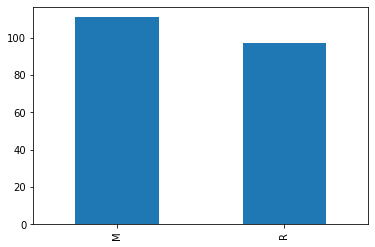

In [33]:
cat_Column(sonar["Class"])

In [42]:
print("Number of missing values each columns: ","\n",sonar.isnull().sum())
print("======"*15)
print("percentage of missing values each columns: ","\n",sonar.isnull().sum()/len(sonar)*100)

Number of missing values each columns:  
 0        0
1        0
2        0
3        0
4        0
        ..
56       0
57       0
58       0
59       0
Class    0
Length: 61, dtype: int64
percentage of missing values each columns:  
 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
56       0.0
57       0.0
58       0.0
59       0.0
Class    0.0
Length: 61, dtype: float64


<AxesSubplot:>

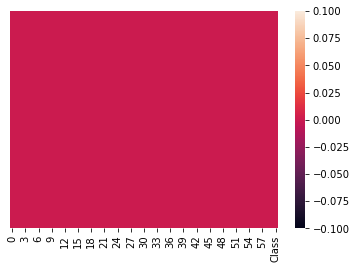

In [43]:
sns.heatmap(sonar.isnull(), yticklabels=False)

# shows that those column missing values

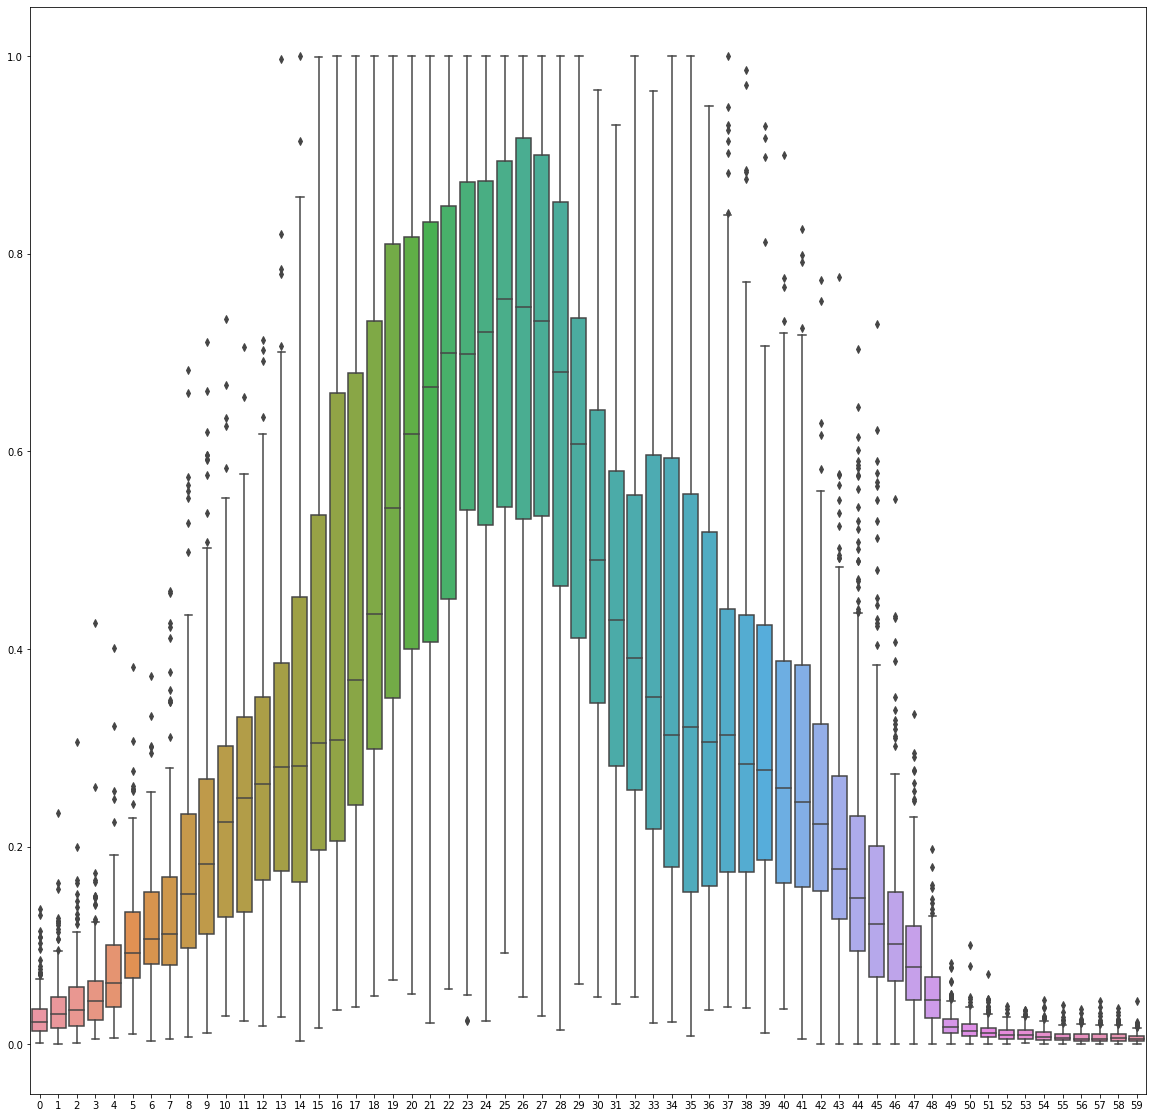

In [36]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= sonar, ax = ax)
plt.show()

In [37]:
sonar.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59, 'Class'],
      dtype='object')

In [31]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


In [51]:
sonar[sonar.dtypes[(sonar.dtypes == "float64") | ( sonar.dtypes == 'int64')].index]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


# Data Visualiztion

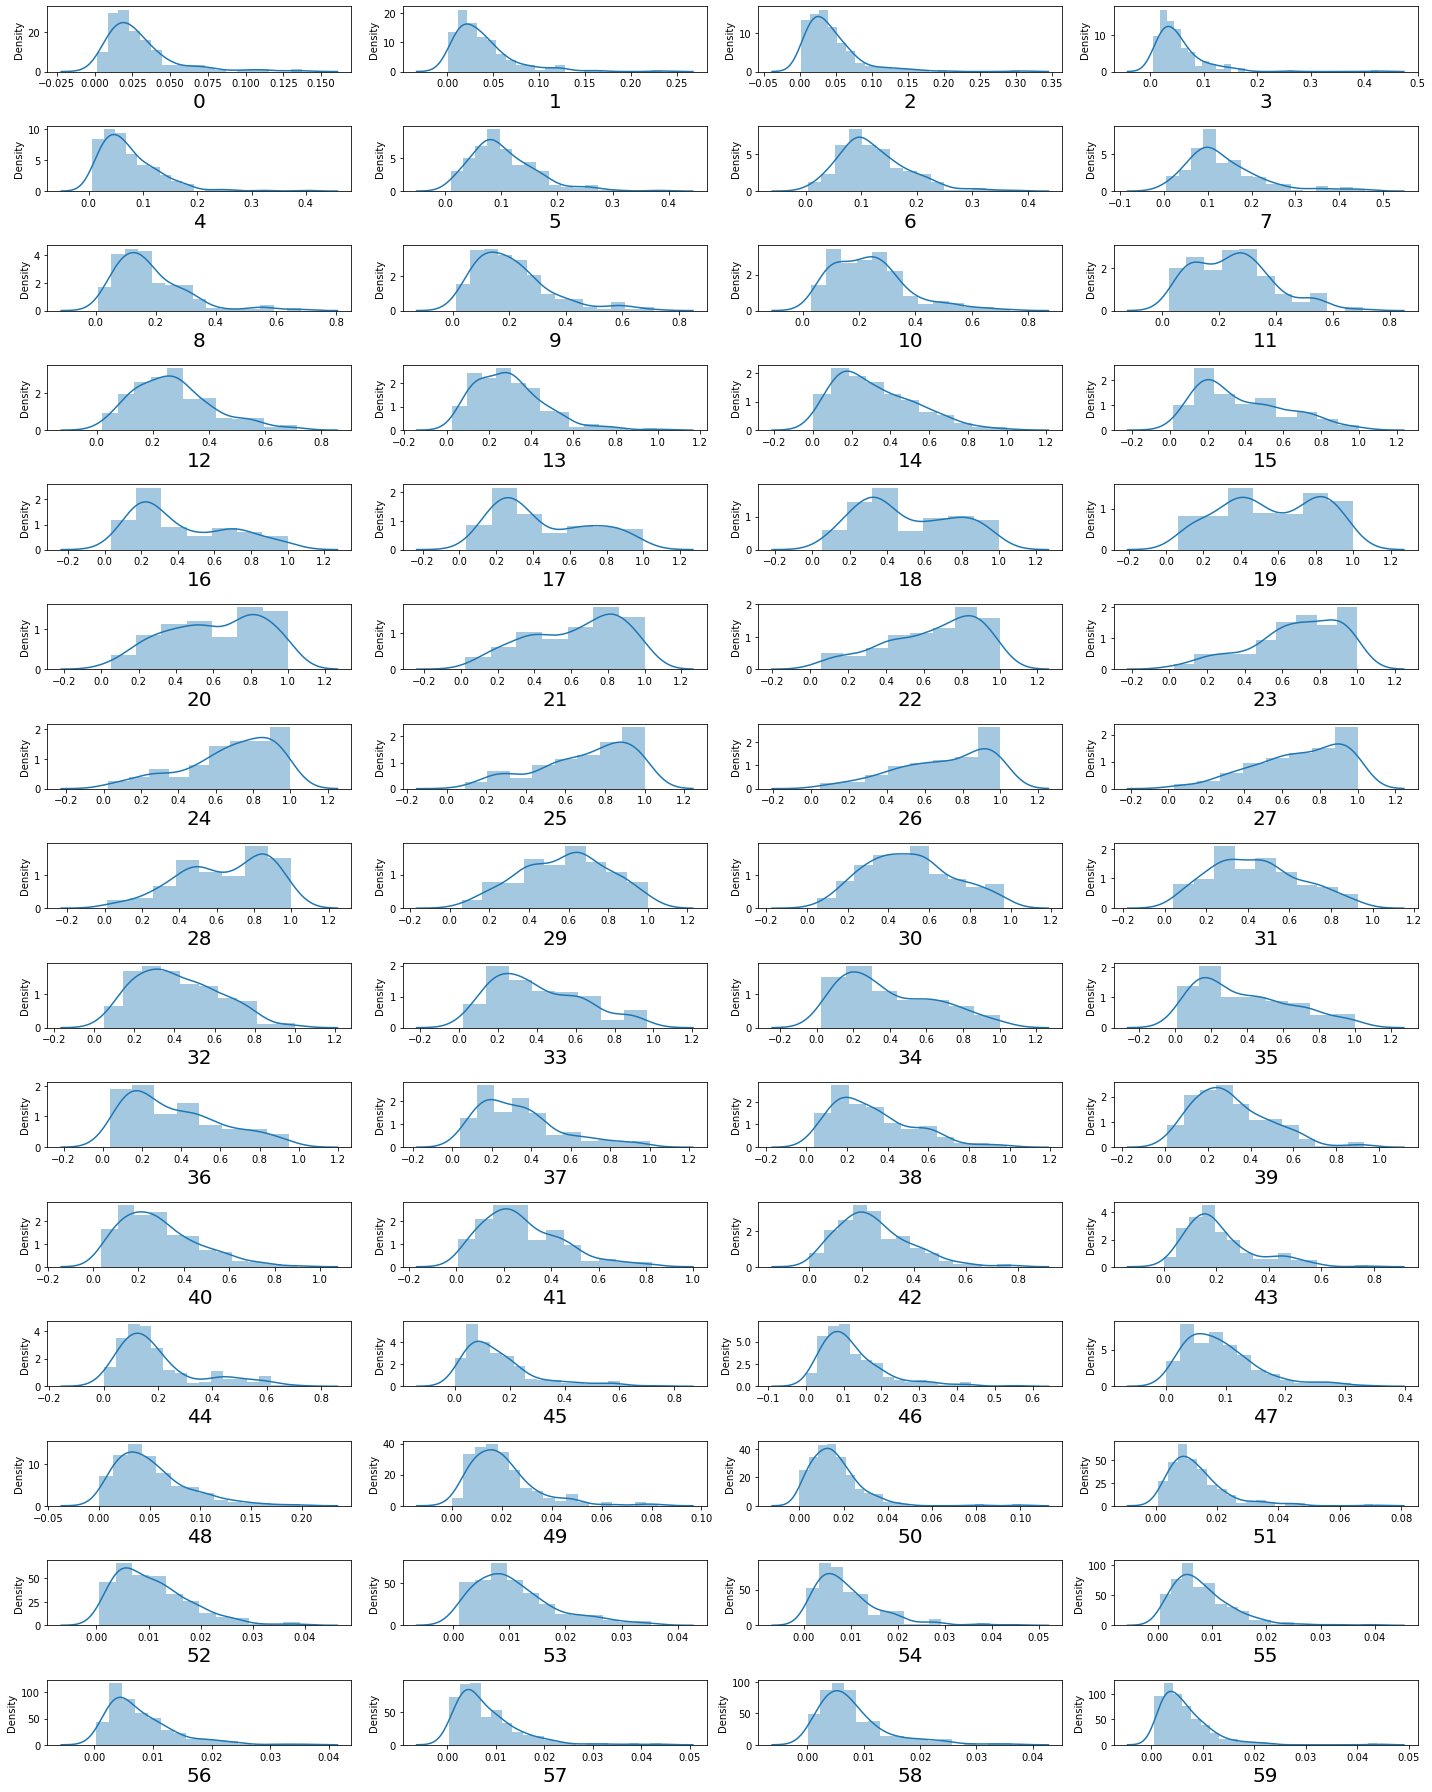

In [47]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in sonar:
    if plotnumber<=60 :
        ax = plt.subplot(15,4,plotnumber)
        sns.distplot(sonar[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [71]:
sonar["Class"]=sonar["Class"].map({"R":1,"M":0})

sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


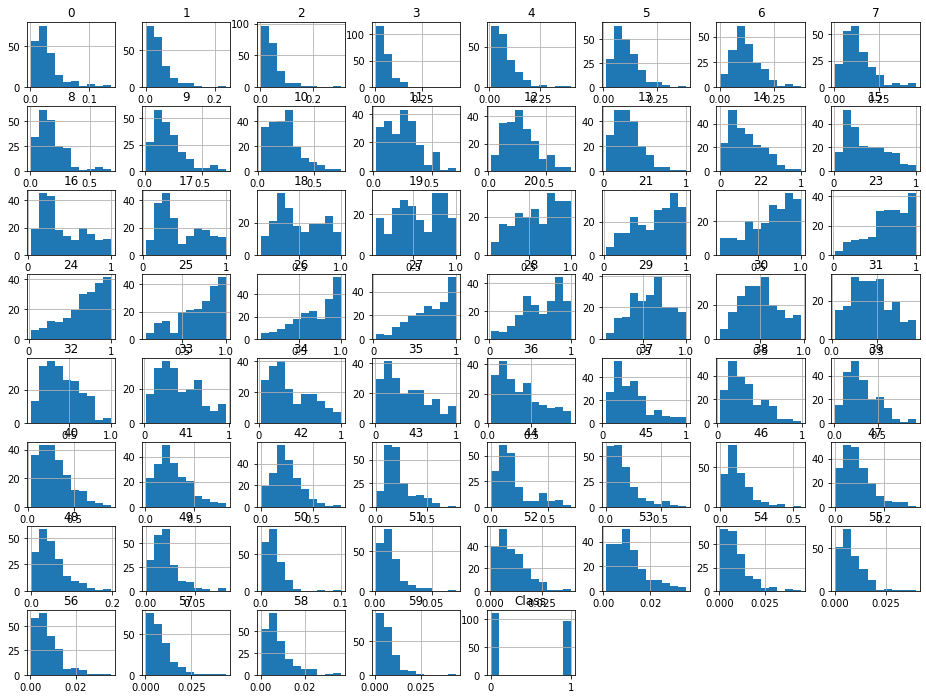

In [74]:
# Histograms
sonar.hist(figsize=(16,12));

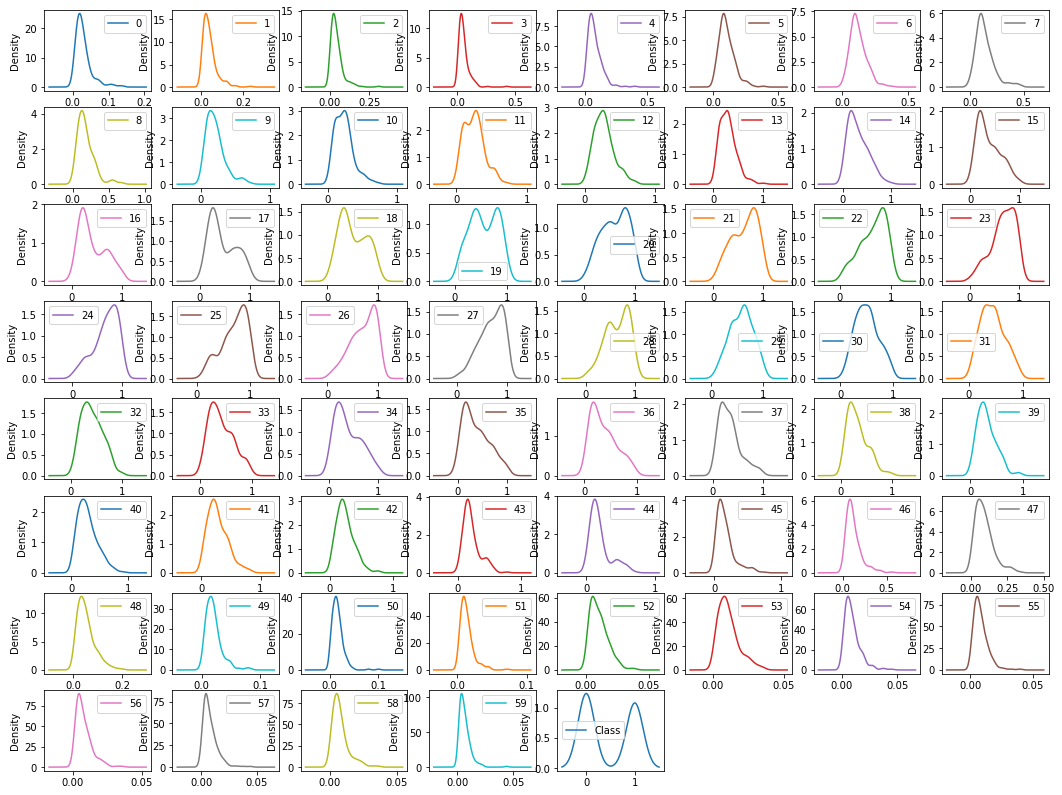

In [75]:
# Density plots
sonar.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

In [72]:
## Feature Selection

In [73]:
corr=sonar.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Class
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,-0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,-0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,-0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,-0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,-0.000933
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,-0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,-0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,-0.090055


<AxesSubplot:>

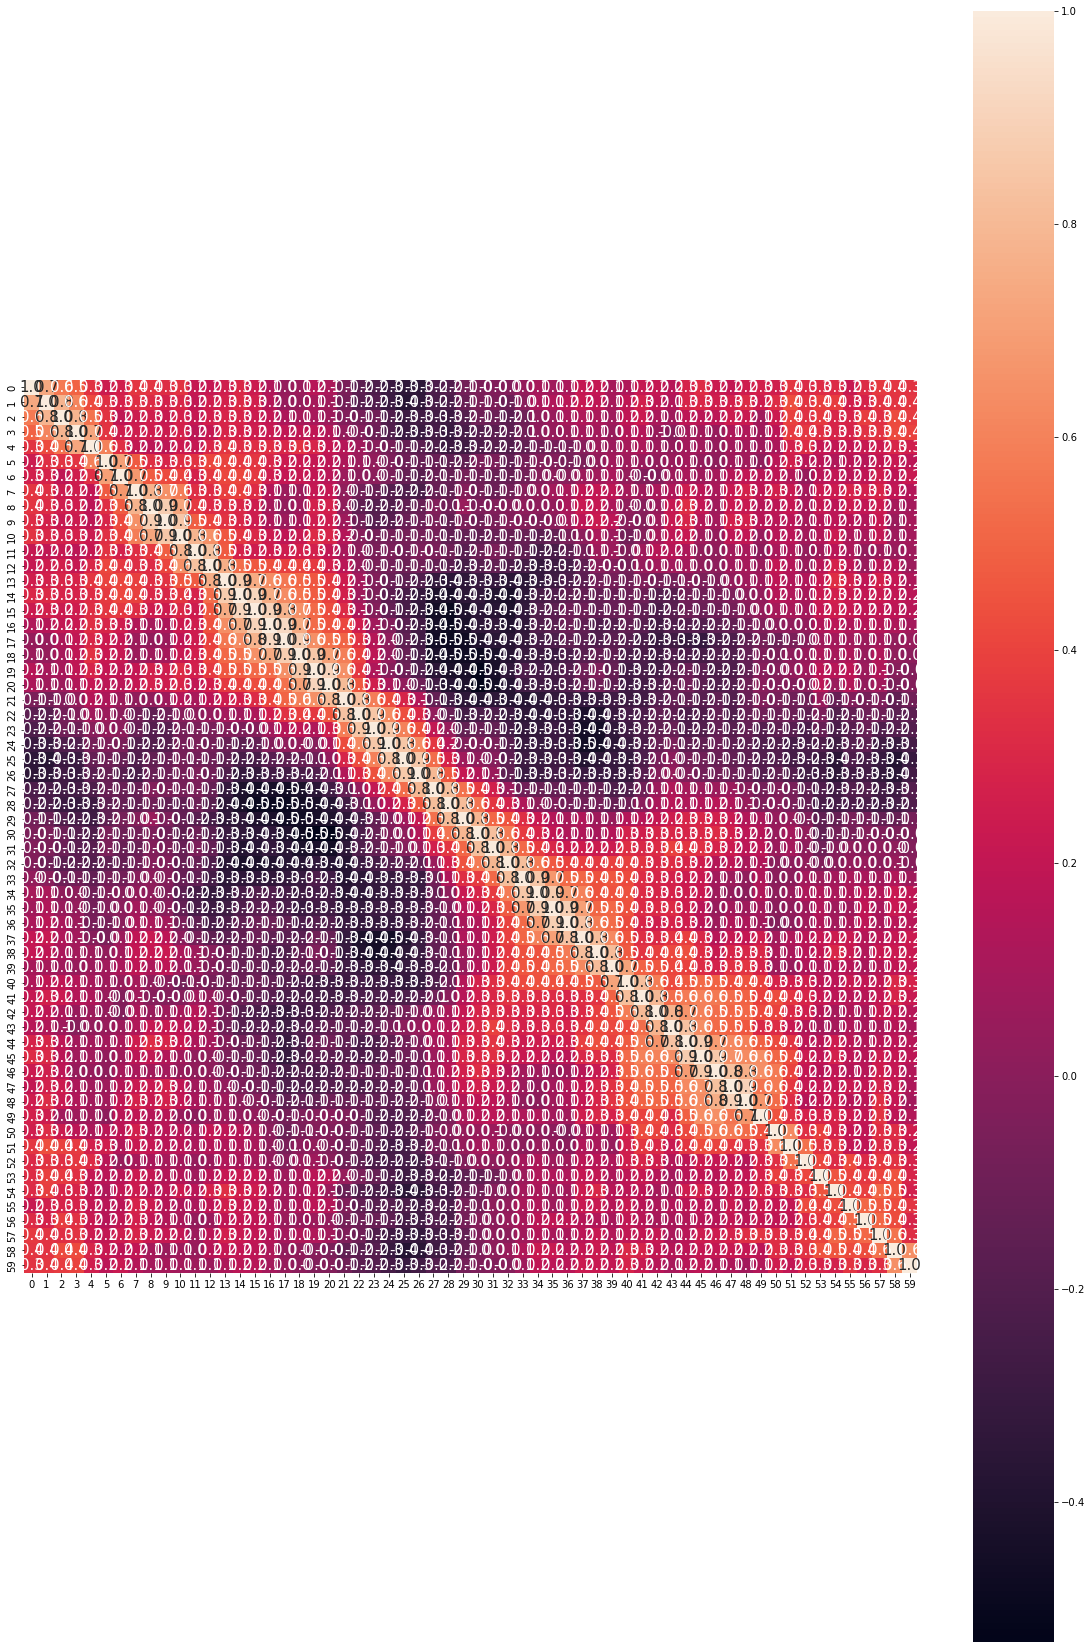

In [50]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,30))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

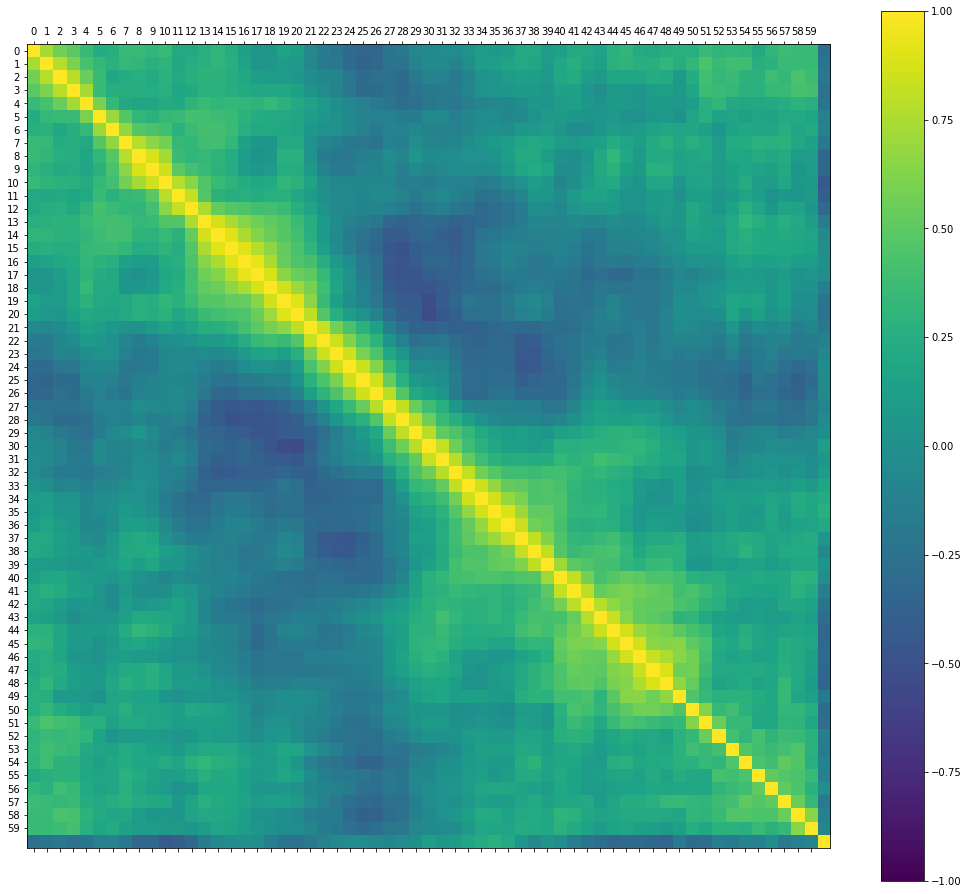

In [76]:
correlations = sonar.corr()

# Plot correlation matrix
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [77]:
# Separating data and labels

X =sonar.drop(columns="Class",axis=1)
y= sonar["Class"]

In [78]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


# Model Bulding

In [79]:
y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int64

In [80]:
"""Sklearn requires the target variable in a separate dataset.
so, we will drop our target variable from the train dataset and save it in another dataset."""

            # Save target variable in separate dataset

'Sklearn requires the target variable in a separate dataset.\nso, we will drop our target variable from the train dataset and save it in another dataset.'

In [83]:
print("Split the data into training and test set")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=10)

#stratify=Y equal number of rock in train & test data and equal number of mine train and test
#This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

Split the data into training and test set


In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(176, 60)
(176,)
(32, 60)
(32,)


In [85]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(X_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(X_test.shape, y_test.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (176, 60), y train: (176,)
X test : (32, 60), y test: (32,)
----------------------------------------------------------------------------------------------------


In [86]:
y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int64

# Logistic Regression

In [87]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_hat=LR.predict(X_train)

print("Train data score","{:.2%}".format(LR.score(X_train, y_train)))

Train data score 81.82%


In [123]:
y_hat=LR.predict(X_train) # clf=model
pred_cv=LR.predict(X_test)

Train_accuracy = accuracy_score(y_train,y_hat)

Test_accuracy = accuracy_score(y_test,pred_cv)

print('The training accuracy is', "{:.2%}".format(Train_accuracy))
print('The test accuracy is', "{:.2%}".format(Test_accuracy))

The training accuracy is 81.82%
The test accuracy is 78.12%


In [137]:
cf_matrix=confusion_matrix(y_test, pred_cv)
cf_matrix

array([[12,  5],
       [ 2, 13]], dtype=int64)

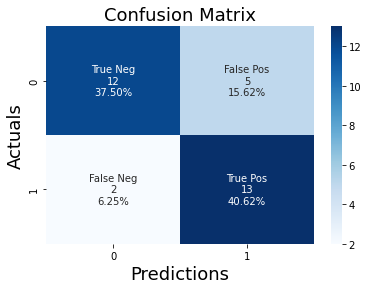

In [135]:
# plot confusion matrix

# labels
group_names = ['True Neg','False Pos','False Neg','True Pos']
# counts
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
# percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [126]:
accuracy_1=metrics.accuracy_score(y_test,pred_cv)
recall_1= metrics.recall_score(y_test,pred_cv)
Precision_1=metrics.precision_score(y_test,pred_cv)
f1_score_1=metrics.f1_score(y_test,pred_cv)
error_1=(1-accuracy_1)


print("Confusion_matrix accuracy_1 :","{:.2%}".format(accuracy_1))
print("Confusion_matrix precision_1 :","{:.2%}".format(Precision_1))
print("Confusion_matrix recall_1 :","{:.2%}".format(recall_1))
print("Confusion_matrix f1_score_1 :","{:.2%}".format(f1_score_1))
print("Confusion_matrix error :","{:.2%}".format(error_1))

Confusion_matrix accuracy_1 : 78.12%
Confusion_matrix precision_1 : 72.22%
Confusion_matrix recall_1 : 86.67%
Confusion_matrix f1_score_1 : 78.79%
Confusion_matrix error : 21.88%


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_cv))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.72      0.87      0.79        15

    accuracy                           0.78        32
   macro avg       0.79      0.79      0.78        32
weighted avg       0.79      0.78      0.78        32



In [127]:
# Area Under Curve
auc = "{:.2%}".format(roc_auc_score(y_test, pred_cv))
auc

'78.63%'

In [ ]:
accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [113]:
roc_curve(y_test, pred_cv)

(array([0.        , 0.29411765, 1.        ]),
 array([0.        , 0.86666667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [114]:
TPR,FPR, thresholds = roc_curve(y_test, pred_cv)

In [115]:
TPR

array([0.        , 0.29411765, 1.        ])

In [116]:
FPR

array([0.        , 0.86666667, 1.        ])

In [117]:
thresholds

array([2, 1, 0], dtype=int64)

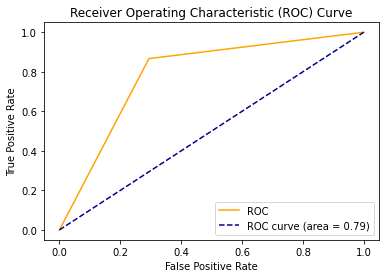

In [119]:
plt.plot(TPR,FPR, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#plt.savefig("Receiver Operating Characteristic (ROC) Curve plot.png")

## Decision Tree

In [138]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
y_DT=DT.predict(X_train) # clf=model
pred_DT=DT.predict(X_test)

Train_accuracy = accuracy_score(y_train,y_DT)

Test_accuracy = accuracy_score(y_test,pred_DT)

print('The training accuracy is', "{:.2%}".format(Train_accuracy))
print('The test accuracy is', "{:.2%}".format(Test_accuracy))

The training accuracy is 100.00%
The test accuracy is 75.00%


In [143]:
dt_matrix=confusion_matrix(y_test, pred_DT)
dt_matrix

array([[12,  5],
       [ 2, 13]], dtype=int64)

In [145]:
accuracy_2=metrics.accuracy_score(y_test,pred_DT)
recall_2= metrics.recall_score(y_test,pred_DT)
Precision_2=metrics.precision_score(y_test,pred_DT)
f1_score_2=metrics.f1_score(y_test,pred_DT)
error_2=(1-accuracy_2)


print("Confusion_matrix accuracy_dt :","{:.2%}".format(accuracy_2))
print("Confusion_matrix precision_dt :","{:.2%}".format(Precision_2))
print("Confusion_matrix recall_dt :","{:.2%}".format(recall_2))
print("Confusion_matrix f1_score_dt :","{:.2%}".format(f1_score_2))
print("Confusion_matrix error_dt :","{:.2%}".format(error_2))

Confusion_matrix accuracy_1 : 75.00%
Confusion_matrix precision_1 : 68.42%
Confusion_matrix recall_1 : 86.67%
Confusion_matrix f1_score_1 : 76.47%
Confusion_matrix error : 25.00%


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.68      0.87      0.76        15

    accuracy                           0.75        32
   macro avg       0.77      0.76      0.75        32
weighted avg       0.77      0.75      0.75        32



In [148]:
# Area Under Curve
auc = "{:.2%}".format(roc_auc_score(y_test, pred_DT))
auc

'75.69%'

# Random Forest

In [151]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
y_RF=RF.predict(X_train)
accuracy_score(y_train,y_RF)

1.0

In [153]:
pred_RF=RF.predict(X_test)
accuracy_score(y_test,pred_RF)

0.875

In [154]:
roc_auc_score(y_test, pred_RF, average=None)

0.8823529411764706

In [155]:
accuracy_3=metrics.accuracy_score(y_test,pred_RF)
recall_3= metrics.recall_score(y_test,pred_RF)
Precision_3=metrics.precision_score(y_test,pred_RF)
f1_score_3=metrics.f1_score(y_test,pred_RF)

In [156]:
print("Confusion_matrix accuracy_3 :",accuracy_3)
print("Confusion_matrix precision_3 :",Precision_3)
print("Confusion_matrix recall_3 :",recall_3)
print("Confusion_matrix f1_score_3 :",f1_score_3)

Confusion_matrix accuracy_3 : 0.875
Confusion_matrix precision_3 : 0.7894736842105263
Confusion_matrix recall_3 : 1.0
Confusion_matrix f1_score_3 : 0.8823529411764706


# SVC

In [157]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

81.25

In [158]:
pred = svc.predict(X_train)
accuracy_score(y_train , pred)*100

86.93181818181817

The highest classification accuracy is shown by Logistic Regression => Train data score 82.17%, and test score is 0.7727272727272727 mean there are less amount of error.

by using hyperparameter tuning to avoid the overfiiting conditions.

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [160]:
#we are tuning three hyperparameters right now, we are passing the different values for both parameters
random_param = {
    'penalty': ['l1', 'l2'],
    'dual' : [True,False],
    'tol' : [1e-4, 1e-2],
    'random_state': range(2,10,1),
    'solver' : ['liblinear', 'saga']
    
}

In [161]:
random_search = RandomizedSearchCV(estimator=LR,
                     param_distributions=random_param,
                     cv=5,
                    n_jobs =-1)

In [162]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'dual': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': range(2, 10),
                                        'solver': ['liblinear', 'saga'],
                                        'tol': [0.0001, 0.01]})

In [163]:
best_parameters = random_search.best_params_
print(best_parameters)

{'tol': 0.0001, 'solver': 'saga', 'random_state': 7, 'penalty': 'l1', 'dual': False}


In [129]:
random_search.best_score_

0.8217391304347826

In [164]:
model = LogisticRegression(penalty = 'l1', tol =0.0001, solver= "saga" ,random_state =7,dual=False)
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=7, solver='saga')

In [165]:
moedel_tr = model.predict(X_train) # clf=model
model_ts = model.predict(X_test)

Train_accuracy = accuracy_score(y_train, moedel_tr)

Test_accuracy = accuracy_score(y_test, model_ts)

print('The training accuracy is', Train_accuracy)
print('The test accuracy is', Test_accuracy)

The training accuracy is 0.8295454545454546
The test accuracy is 0.6875


In [166]:
roc_auc_score(y_test, model_ts, average=None)

0.6901960784313725

In [167]:
# making a predictive system

In [176]:
input_data=(0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,0.1156,0.1654,0.3833,0.3598,0.1713,0.1136,0.0349,0.3796,0.7401,0.9925,0.9802,0.8890,0.6712,0.4286,0.3374,0.7366,0.9611,0.7353,0.4856,0.1594,0.3007,0.4096,0.3170,0.3305,0.3408,0.2186,0.2463,0.2726,0.1680,0.2792,0.2558,0.1740,0.2121,0.1099,0.0985,0.1271,0.1459,0.1164,0.0777,0.0439,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022)

# changing the input_data to numpy array
input_data_as=np.array(input_data)

# reshape the np array as we are predicting for one intsance

reshape=input_data_as.reshape(1,-1)

pred=LR.predict(reshape)
print(pred)

if (pred[0]==1):
    print("Rock")
else:
    print("Mine")

[0]
Mine


In [177]:
input_data_as

array([0.0223, 0.0375, 0.0484, 0.0475, 0.0647, 0.0591, 0.0753, 0.0098,
       0.0684, 0.1487, 0.1156, 0.1654, 0.3833, 0.3598, 0.1713, 0.1136,
       0.0349, 0.3796, 0.7401, 0.9925, 0.9802, 0.889 , 0.6712, 0.4286,
       0.3374, 0.7366, 0.9611, 0.7353, 0.4856, 0.1594, 0.3007, 0.4096,
       0.317 , 0.3305, 0.3408, 0.2186, 0.2463, 0.2726, 0.168 , 0.2792,
       0.2558, 0.174 , 0.2121, 0.1099, 0.0985, 0.1271, 0.1459, 0.1164,
       0.0777, 0.0439, 0.0061, 0.0145, 0.0128, 0.0145, 0.0058, 0.0049,
       0.0065, 0.0093, 0.0059, 0.0022])

In [178]:
reshape

array([[0.0223, 0.0375, 0.0484, 0.0475, 0.0647, 0.0591, 0.0753, 0.0098,
        0.0684, 0.1487, 0.1156, 0.1654, 0.3833, 0.3598, 0.1713, 0.1136,
        0.0349, 0.3796, 0.7401, 0.9925, 0.9802, 0.889 , 0.6712, 0.4286,
        0.3374, 0.7366, 0.9611, 0.7353, 0.4856, 0.1594, 0.3007, 0.4096,
        0.317 , 0.3305, 0.3408, 0.2186, 0.2463, 0.2726, 0.168 , 0.2792,
        0.2558, 0.174 , 0.2121, 0.1099, 0.0985, 0.1271, 0.1459, 0.1164,
        0.0777, 0.0439, 0.0061, 0.0145, 0.0128, 0.0145, 0.0058, 0.0049,
        0.0065, 0.0093, 0.0059, 0.0022]])

In [179]:
np.arange(6).reshape((-1, 1))

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [173]:
np.arange(6).reshape((1, -1))

array([[0, 1, 2, 3, 4, 5]])